In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from experiments import get_state

SCRIPT_RESULTS_PATHS = "results/script_results"

#### Normal ($\mu = 0.5, \sigma = 0.3$)

In [19]:
dist_type = "normal"
dist_params = {"x_points": (0, 1), "loc": 0.5, "scale": 0.3}
num_qubits = 15

target_state = get_state(num_qubits, dist_type, dist_params)

/tmp/ipykernel_18213/1507420536.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)


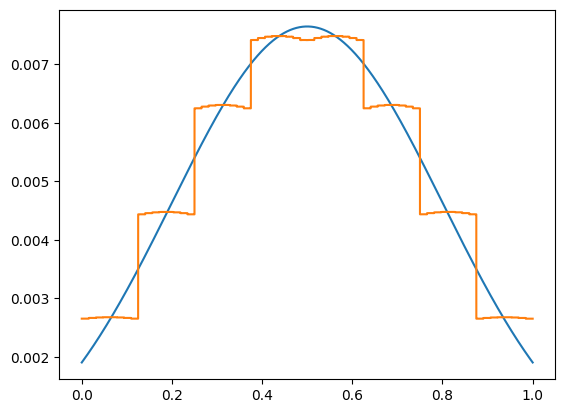

In [30]:
approx_file = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"modified_plot_{dist_type}_{num_qubits}qb_0.05eps.csv")
approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)

mean_approx= np.mean(approx_states, axis=0)

x_points = np.linspace(0, 1, 2**num_qubits)

plt.plot(x_points, target_state)
plt.plot(x_points, approx_states[8])
plt.show()

#### $log$-normal ($\mu = 0.1, \sigma = 0.3$)

/tmp/ipykernel_18213/3751944245.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)


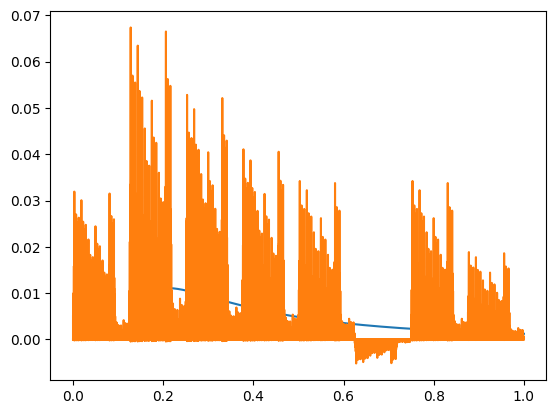

In [8]:
dist_type = "lognormal"
dist_params = {"x_points": (0, 1), "s": 1, "loc": 0.1, "scale": 0.3}
num_qubits = 15

target_state = get_state(num_qubits, dist_type, dist_params)

approx_file = os.path.join(SCRIPT_RESULTS_PATHS, dist_type, f"modified_plot_{dist_type}_{num_qubits}qb_0.05eps.csv")
approx_states = np.loadtxt(approx_file, delimiter=",", dtype=np.complex64).astype(np.float32)

mean_approx= np.mean(approx_states, axis=0)

x_points = np.linspace(0, 1, 2**num_qubits)

plt.plot(x_points, target_state)
plt.plot(x_points, approx_states[0])
plt.show()